In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:
from sklearn.datasets import fetch_california_housing
calif_data = fetch_california_housing()

### Part 1 Reading and Understanding Data (Regression part)
I have fetched the california housing dataset from sklearn and did some data exploration to see what features are there, if there are any missing values and what is the basic statistis of each feature. As seen through 'df.info()' there are no missing values in the dataset because there are all 20640 non-null values. There appears to be some outliers in the dataset looking at the max values for some features using 'X.describe()', by comparing the max value and the mean values there are outliers present.

In [4]:
#Created a full dataframe with both feature variables and target variable
df = pd.DataFrame(data=calif_data.data, columns=calif_data.feature_names)
df["MedHouseValue"] = calif_data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
#saving X_dataframe and y 
X = df.drop("MedHouseValue", axis=1)
y = df["MedHouseValue"]

In [6]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseValue, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [10]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Part 2 Visualization

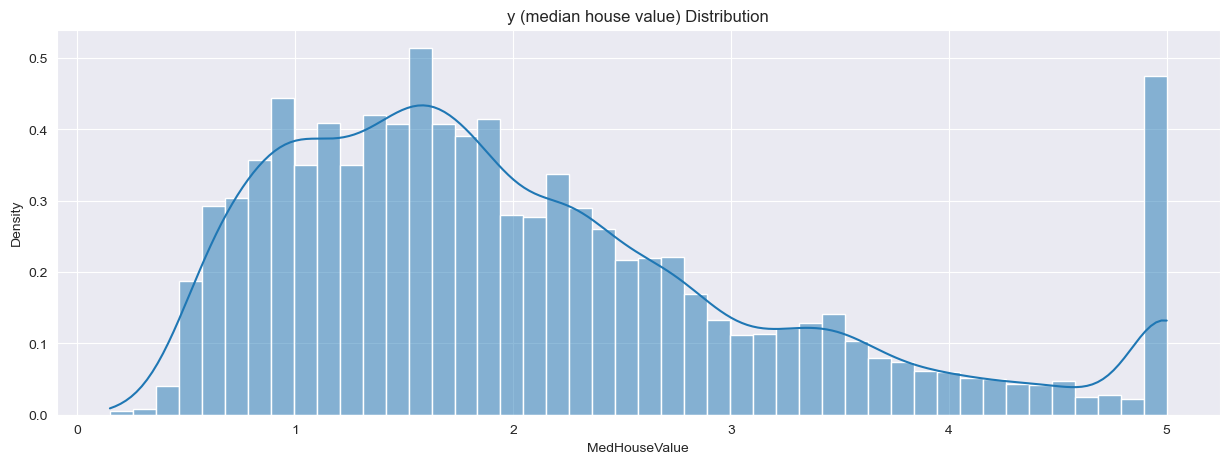

In [11]:
#histogram of y
fig, axes = plt.subplots(nrows=1, ncols =1)

sns.histplot(y, kde=True, stat='density',ax=axes)
axes.set(title="y (median house value) Distribution")
plt.show()

Based on the above histogram we can visually see the distrubition of income, the peak is between 1 and 2 and there is the presence of outlier at 5. The distrubition is skewed to the right.

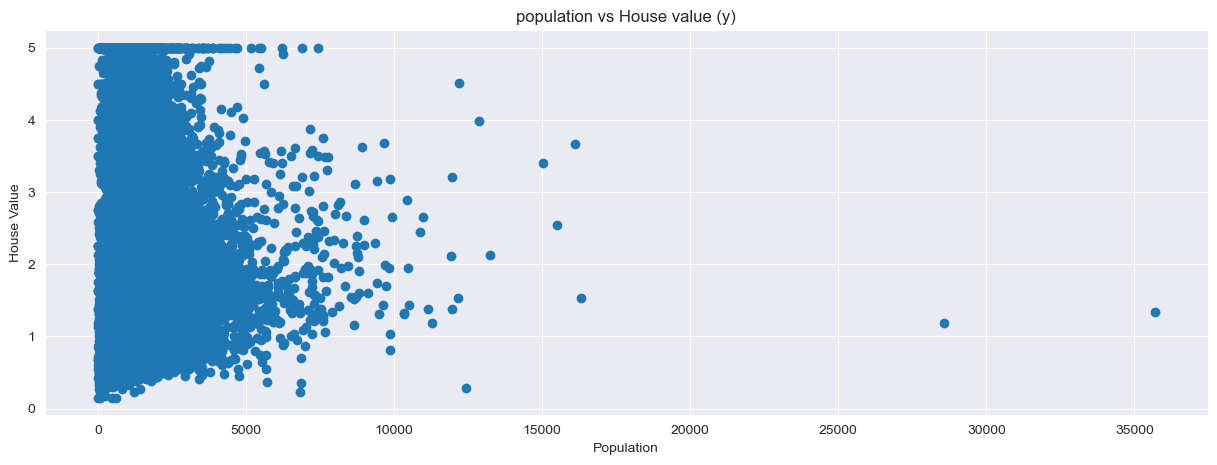

In [12]:
# Scatter plot of population vs House value (y)
plt.scatter(X['Population'], y)
plt.xlabel('Population')
plt.ylabel('House Value')
plt.title('population vs House value (y)')
plt.show()

Based on the above scatter plot we can visually see the distrubition of population and house value, we can conclude that most of the data is clusterd evenly but there exists some outliers with really hight populations values.

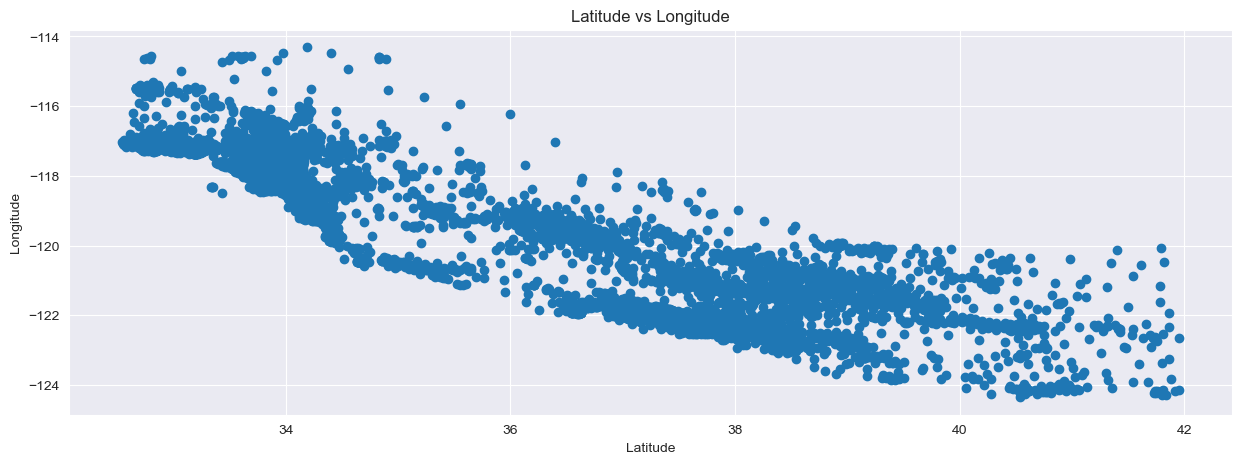

In [13]:
# Scatter plot of Latitude vs Longitude
plt.scatter(X['Latitude'], X['Longitude'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Latitude vs Longitude')
plt.show()

Based on the above scatter plot we can visually see the distrubition of Latitude vs Longitude. There appears to be a negative linear correlation between these two variables. There is are no outliers in this distrubition.

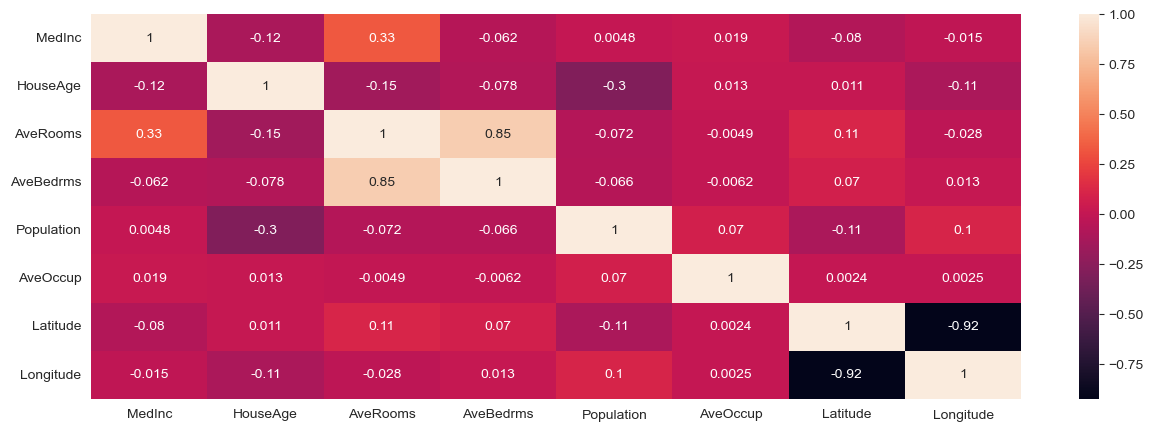

In [14]:
#heatmap
sns.heatmap(X.corr(), annot=True)
plt.show()

Based on the above heatmap, there appreas to be a strong positive correlation with feature AveRooms and AveBedrms at 0.85 correlation rate. As previously seen in the scatter plot with features Latitude and Longitude, it has a strong negative correlation with -0.95. These 4 features are the only ones that are showing strong correlation and multicolinearity. 

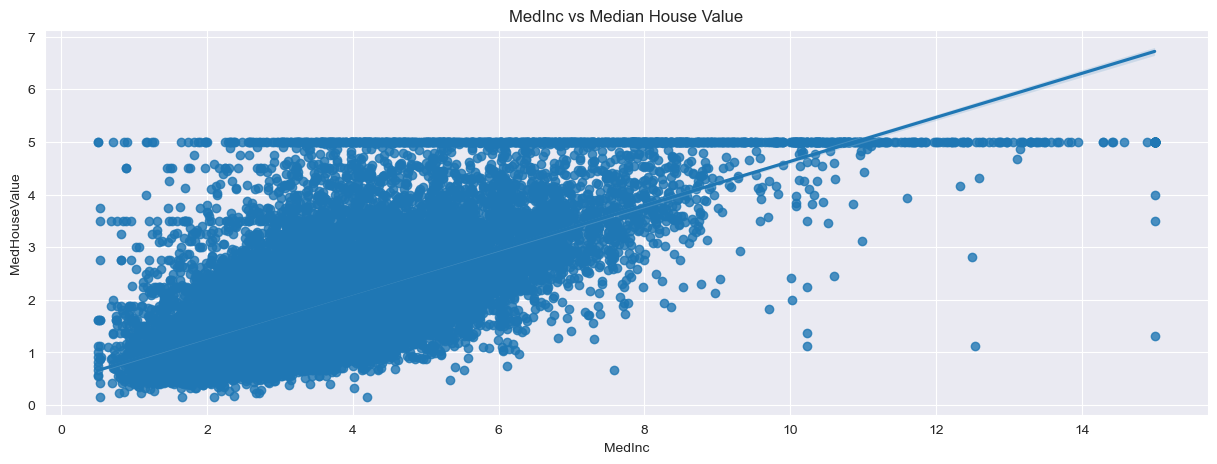

In [15]:
sns.regplot(x=X['MedInc'], y=y)
plt.title('MedInc vs Median House Value')
plt.show()

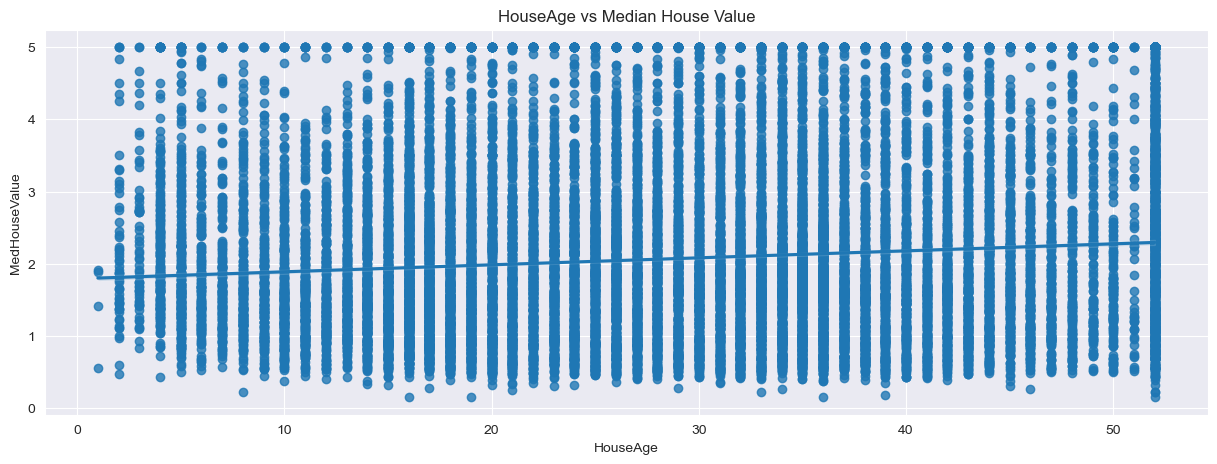

In [16]:
sns.regplot(x=X['HouseAge'], y=y)
plt.title('HouseAge vs Median House Value')
plt.show()

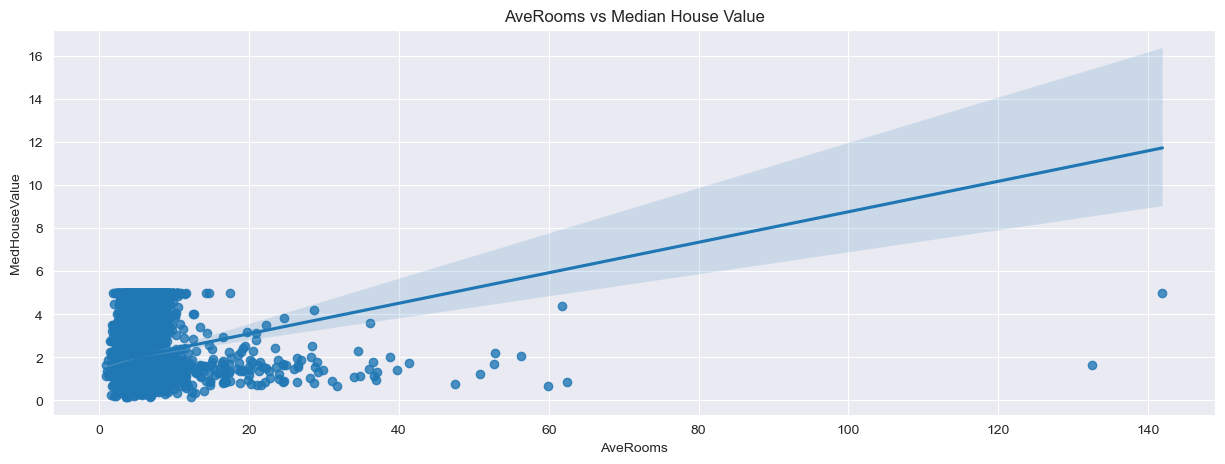

In [17]:
sns.regplot(x=X['AveRooms'], y=y)
plt.title('AveRooms vs Median House Value')
plt.show()

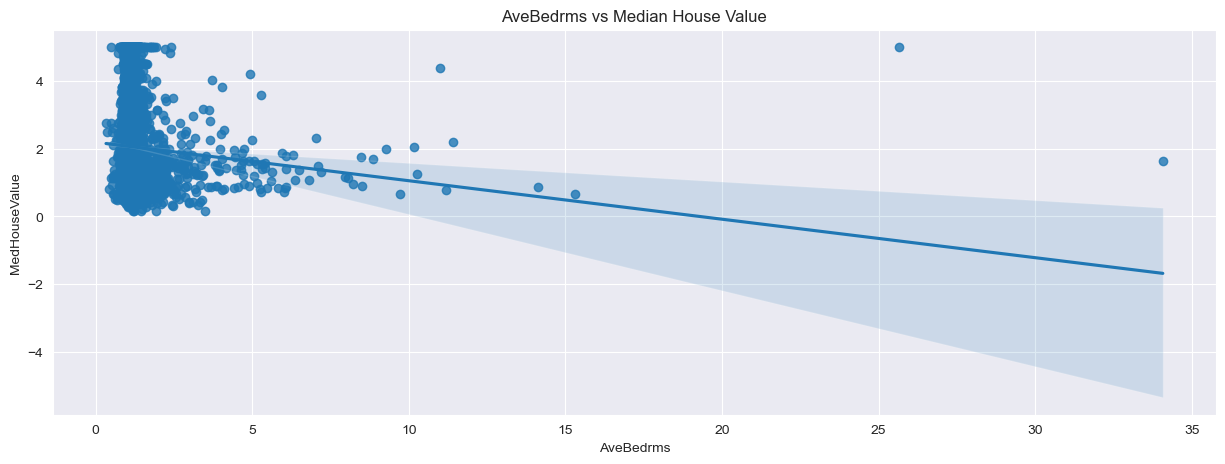

In [18]:
sns.regplot(x=X['AveBedrms'], y=y)
plt.title('AveBedrms vs Median House Value')
plt.show()

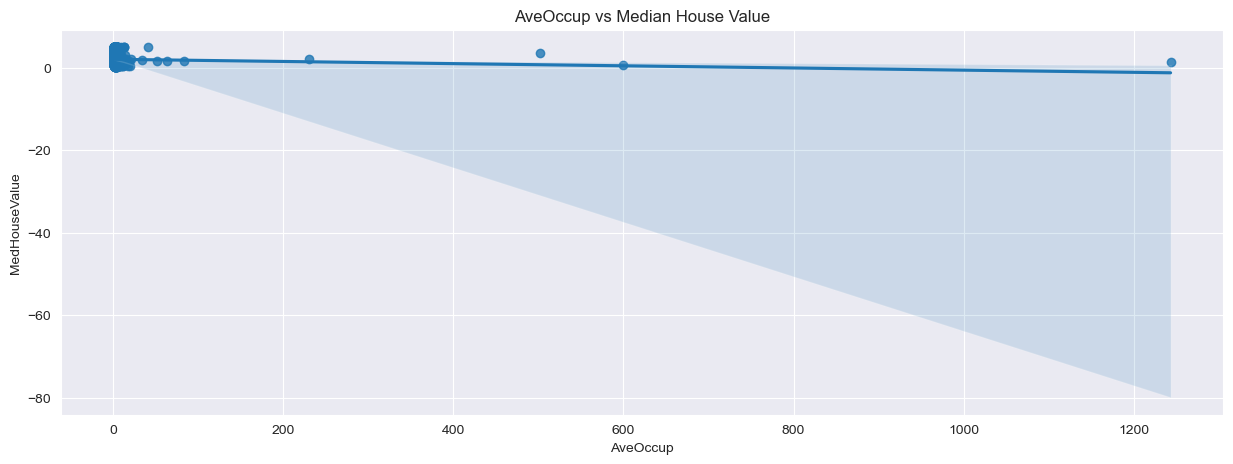

In [19]:
sns.regplot(x=X['AveOccup'], y=y)
plt.title('AveOccup vs Median House Value')
plt.show()

Based on the regression plots above, The medInc feature overall has a positive correlation because the regression line is an upward slope, but the data points for house values do flatten out at 5, so there is an almost straight line boundry created visually. HouseAge vs house value shows not much of a slope relation though it seems like there is a slight increasing slop for it. AveRooms vs House values has a positive correlation as shown with the upward slope with the regression line. AveBedrms vs House has the oppsite trend with an negative correlation that has a downward slope. The AveOccup slope shows a rather flat line indication not much correlation between these two features. 

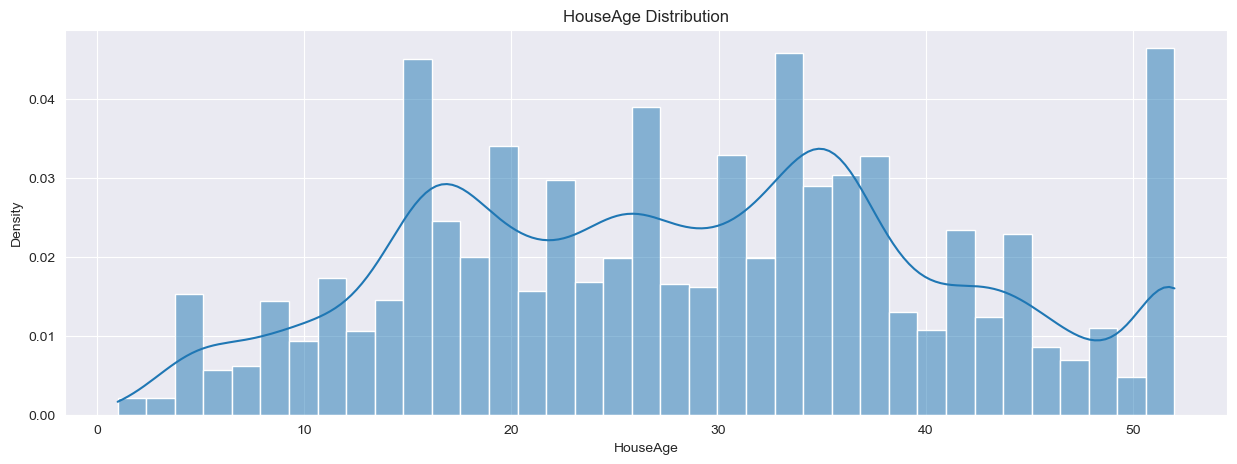

In [20]:
#histogram of HouseAge
fig, axes = plt.subplots(nrows=1, ncols =1)

sns.histplot(X['HouseAge'], kde=True, stat='density',ax=axes)
axes.set(title="HouseAge Distribution")
plt.show()

Based on the above histogram for houseAge, looking at the distrubition there appears to be several peaks for this and also a almost a flate trend as there appears to be no clear positive or negative overall trend.

### Part 3 Model Creation and Evaluation

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

In [22]:
# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
#Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30)

In [24]:
#Create neural network model
model = MLPRegressor(hidden_layer_sizes=(130, 64, 32, 16), activation='relu', max_iter=150)
model.fit(X_train, y_train)

C:\Users\svemi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(130, 64, 32, 16), max_iter=150)

In [25]:
predictions = model.predict(X_test)

In [26]:
r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2:.4f}")

R² Score: 0.7917


In [47]:
#Try different parameters
model = MLPRegressor(hidden_layer_sizes=(175, 54, 33), activation='relu', max_iter=100)
model.fit(X_train, y_train)

C:\Users\svemi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(175, 54, 33), max_iter=100)

In [48]:
predictions = model.predict(X_test)

r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2:.4f}")

R² Score: 0.7977


Changing the hidden layer sizes gave a similar r-squared value. But the r-squared value of 0.79 is good fit. This means that alomst 79% of the data is being explained by the model and the model is able to capture patterns in the dataset. I tried also experimenting using gridsearchCV but for some reason running for a long time with out ever outputting. So instead I just played around by changing hidden layers values. 

### Part 4

In [49]:
from sklearn.datasets import load_iris
iris = load_iris()

In [50]:
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target

In [51]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [52]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [53]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


Looking at the results from df_iris.describe() there appears to be no outlies, as the values of max for each feature is not that far off from the mean. There are also no missing values as seen in the df_iris.info() results.

C:\Users\svemi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


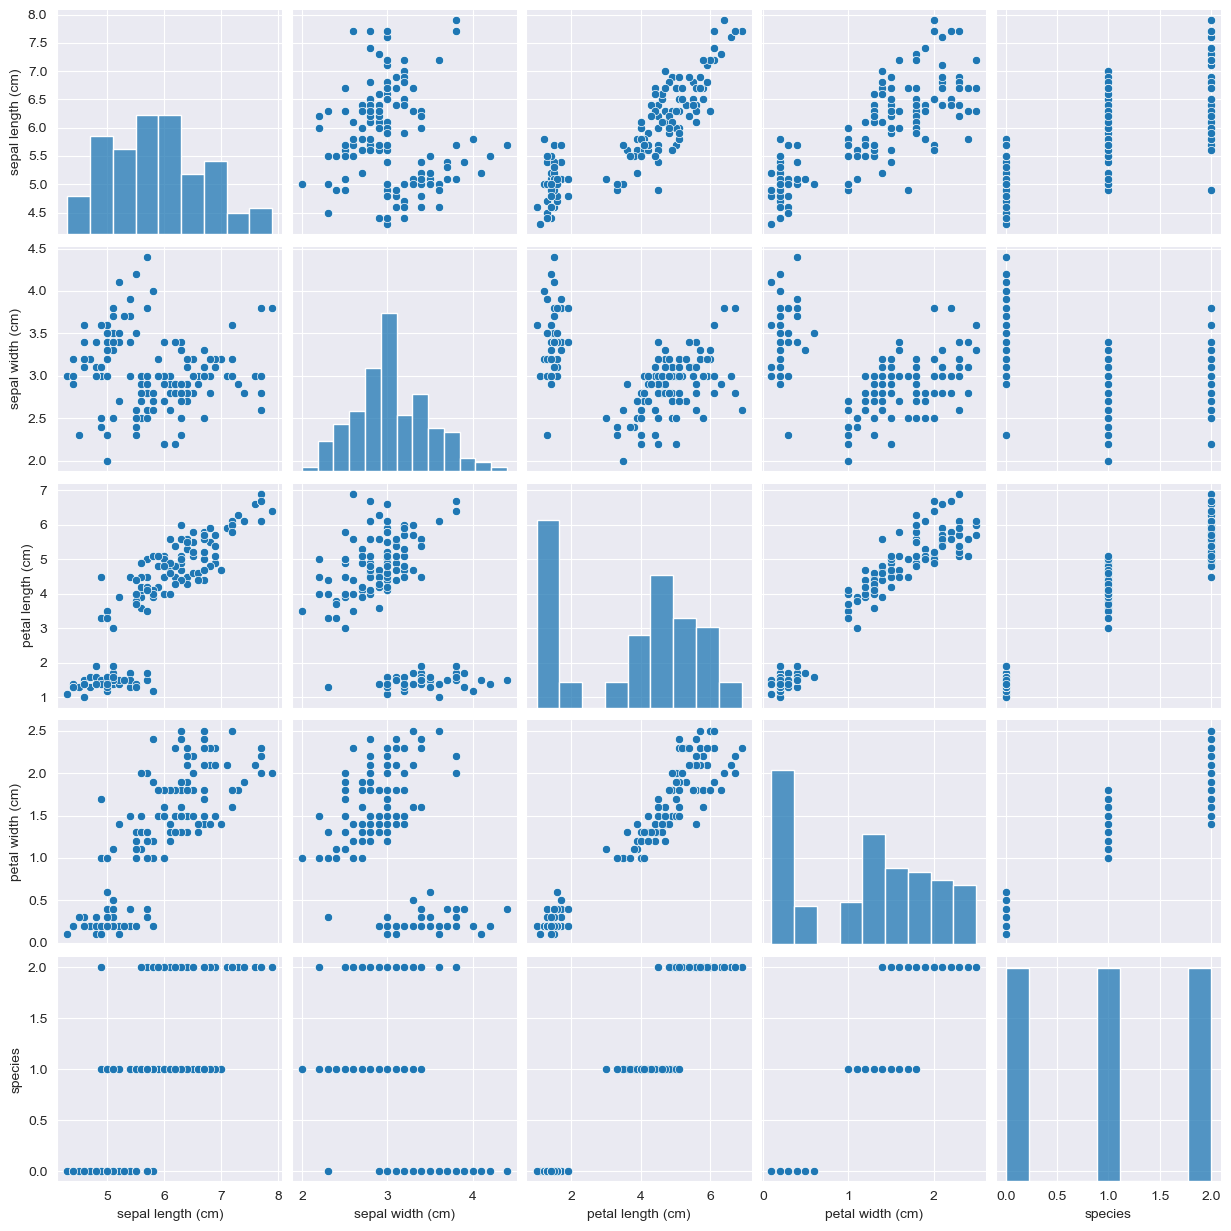

In [54]:
sns.pairplot(df_iris)
plt.show()

Based on the pairplot we can tell that there are 3 species of our target variable. Some clustere show a little correlations. Overall the data is spread out with some clusters but there appears to be no outliers present

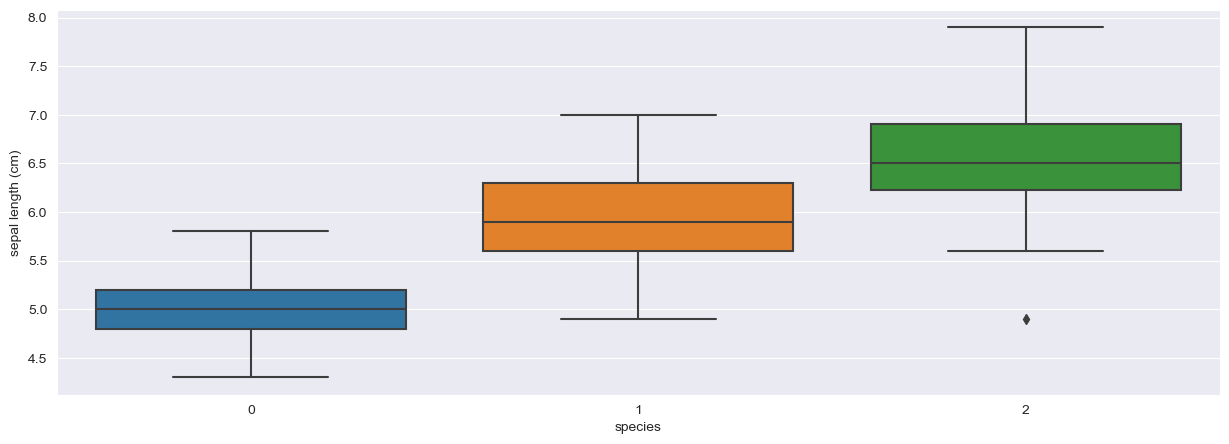

In [55]:
sns.boxplot(x=df_iris['species'], y=df_iris['sepal length (cm)'])
plt.show()

Based on the boxplot above, I can conclude that there are more species of type 2 that have larger sepal lenghth than species of type 0. And there is a outlier present for species type 2.

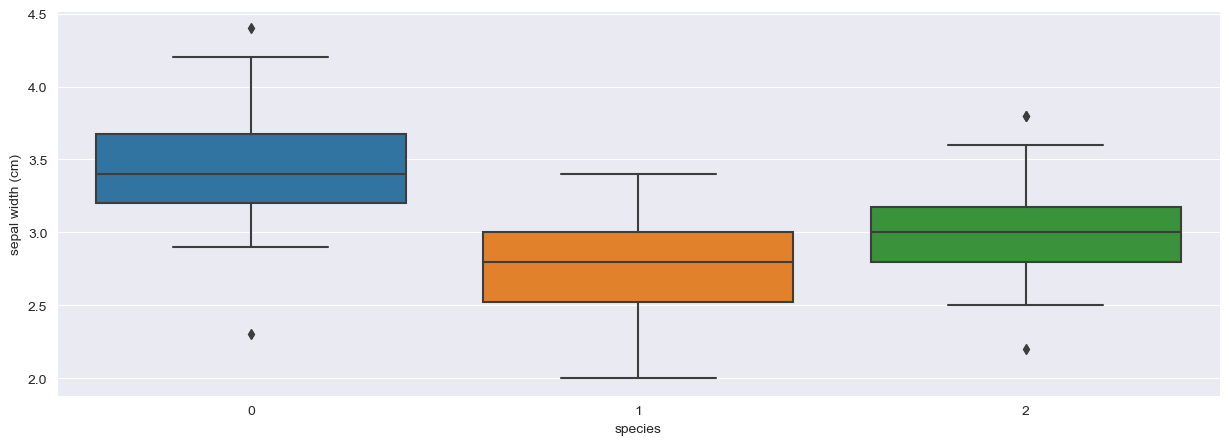

In [56]:
sns.boxplot(x=df_iris['species'], y=df_iris['sepal width (cm)'])
plt.show()

Based on the boxplot above, I can conclude that there are more species of type 0 that have larger sepal width than species of type 1 or type 2. And there is are outlier present for species type 0 and type 2.

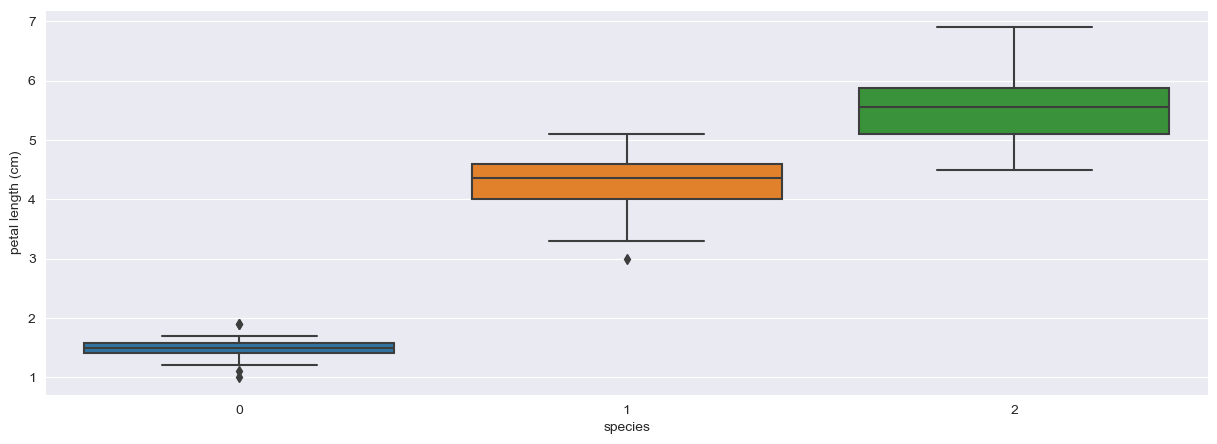

In [57]:
sns.boxplot(x=df_iris['species'], y=df_iris['petal length (cm)'])
plt.show()

Based on the boxplot above, I can conclude that there are more species of type 1 and 2 that have larger petal length than species of type 0, type 0 has really small distrubition range. And there are outlier present for species type 0 and type 1.

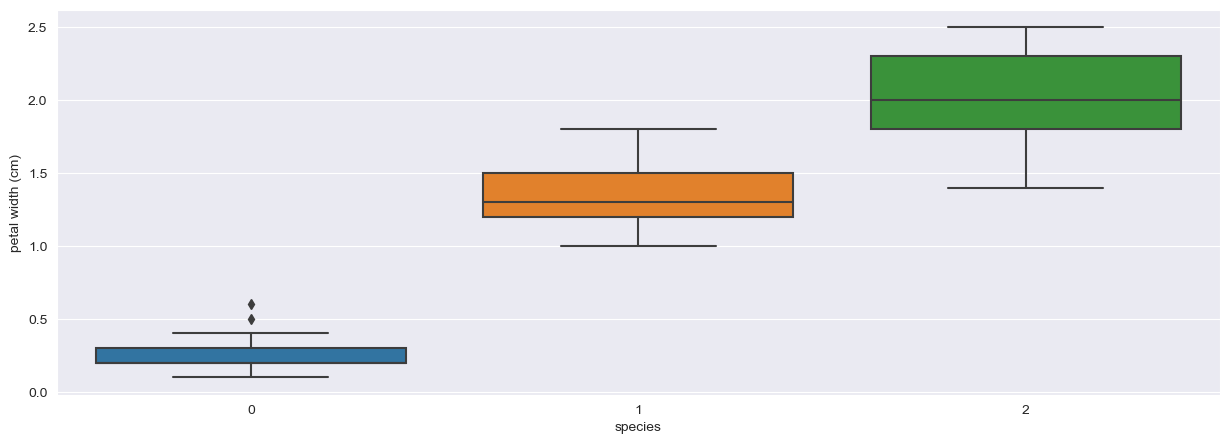

In [59]:
sns.boxplot(x=df_iris['species'], y=df_iris['petal width (cm)'])
plt.show()

Based on the boxplot above, I can conclude that there are more species of type 1 and 2 that have larger petal width than species of type 0. Species type 0 has really small distrubition range while species type 2 has a wider distrubition range. And there are outlier present for species type 0.

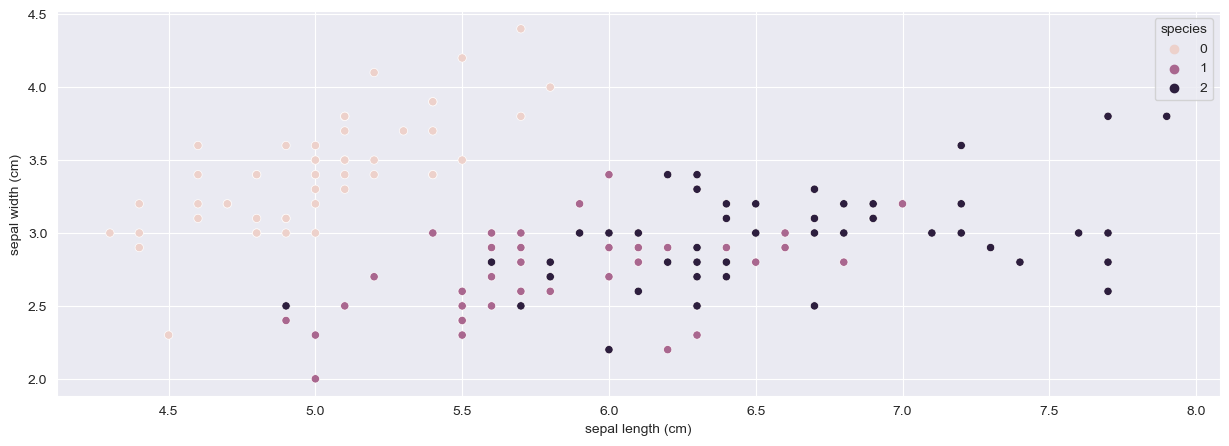

In [61]:
sns.scatterplot(x=df_iris['sepal length (cm)'], y=df_iris['sepal width (cm)'], hue=df_iris['species'])
plt.show()

Based on the above scatterplot, species of type 0 are all clusterd with the max range sepal length of 6. And the cluster of type 0 species is clearly seperated from the other two types and there is not much overlap. Whereas species of type 1 and 2 are overlappingg together are the clusters are not easily seperatable unlike type 0.

In [62]:
#Model creation and evaluation
X_iris = df_iris.drop(columns=['species'])
y_iris = df_iris['species']

#scale data
scaler = StandardScaler()
X_scaled_iris = scaler.fit_transform(X_iris)

#split and train
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_scaled_iris, y_iris, test_size=0.30)

In [94]:
from sklearn.neural_network import MLPClassifier

# neural network classifier
model_iris = MLPClassifier(hidden_layer_sizes=(256,128,64,32), activation='relu', max_iter=200)
model_iris.fit(X_train_iris, y_train_iris)

MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32))

In [75]:
predictions_iris = model_iris.predict(X_test_iris)

In [76]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_iris, predictions_iris)
print(f"Mean Accuracy: {accuracy:.4f}")

Mean Accuracy: 0.9556


In [93]:
#try different hidden layers
model_iris = MLPClassifier(hidden_layer_sizes=(400,389,70), activation='relu', max_iter=200)
model_iris.fit(X_train_iris, y_train_iris)

predictions_iris = model_iris.predict(X_test_iris)
accuracy = accuracy_score(y_test_iris, predictions_iris)
print(f"Mean Accuracy: {accuracy:.4f}")

Mean Accuracy: 0.9556


In [102]:
from sklearn.model_selection import GridSearchCV
# try using gridsearchCV
param_grid = {
    'hidden_layer_sizes': [(256, 128, 64, 32),(128, 64, 32), (64, 32)],
    'activation': ['relu'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [600]
}
model_iris = MLPClassifier()
grid_search = GridSearchCV(estimator=model_iris, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_iris, y_train_iris)

best_model = grid_search.best_estimator_
predictions_iris_grid = best_model.predict(X_test_iris)
accuracy_grid = accuracy_score(y_test_iris, predictions_iris_grid)
print(f"Mean Accuracy: {accuracy_grid:.4f}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Mean Accuracy: 0.9556


The mean accuracy is 0.95 which is really good, I tried different parameters of hidden layer and also did gridesearchCV. And the best mean accuracy rate is 0.9556. The model performed very well here with at accuracy rate 95%.

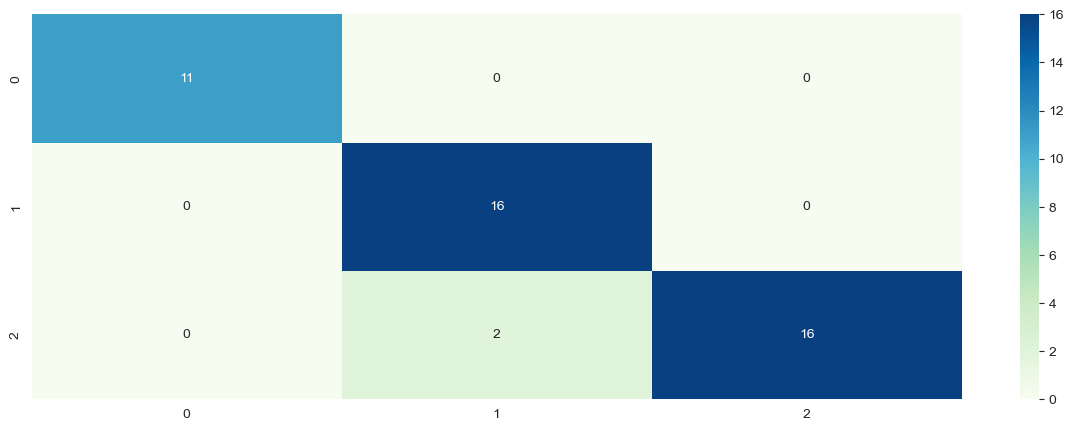

In [108]:
from sklearn.metrics import confusion_matrix

#confusion matrix
confu_matrix = confusion_matrix(y_test_iris, predictions_iris)

sns.heatmap(confu_matrix, annot=True, cmap="GnBu")
plt.show()